<a href="https://colab.research.google.com/github/Dipin-Adhikari/Life-expectency/blob/main/Life_expectency_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from joblib import dump

In [107]:
data = pd.read_csv("/content/Life expectancy.csv")

In [108]:
data.head()

,Entity,Year,Life expectancy
0,Australia,1802,34.049999
1,Australia,1803,34.049999
2,Australia,1804,34.049999
3,Australia,1805,34.049999
4,Australia,1806,34.049999


In [109]:
print(f"The length of the data is {len(data.index)}")

The length of the data is 3253


In [110]:
data.isnull().sum()

Entity             0
Year               0
Life expectancy    0
dtype: int64

In [111]:
country = pd.get_dummies(data['Entity'])
country.head()

,Australia,Brazil,Canada,China,France,Germany,India,Italy,Japan,Mexico,Russia,Spain,Switzerland,United Kingdom,United States
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [112]:
data = pd.concat([data, country], axis=1)
data.head()

,Entity,Year,Life expectancy,Australia,Brazil,Canada,China,France,Germany,India,Italy,Japan,Mexico,Russia,Spain,Switzerland,United Kingdom,United States
0,Australia,1802,34.049999,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Australia,1803,34.049999,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Australia,1804,34.049999,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Australia,1805,34.049999,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Australia,1806,34.049999,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [113]:
data.drop(['Entity'], axis=1, inplace=True)

In [114]:
data.head()

,Year,Life expectancy,Australia,Brazil,Canada,China,France,Germany,India,Italy,Japan,Mexico,Russia,Spain,Switzerland,United Kingdom,United States
0,1802,34.049999,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1803,34.049999,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1804,34.049999,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1805,34.049999,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1806,34.049999,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Life expectancy')

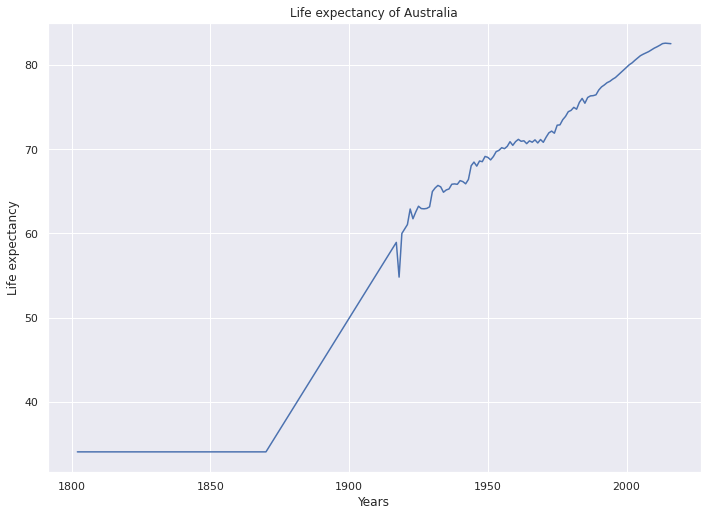

In [115]:
plt.plot(data.iloc[:215]['Year'], data.iloc[:215]['Life expectancy'])
plt.title("Life expectancy of Australia")
plt.xlabel('Years')
plt.ylabel("Life expectancy")

Text(0, 0.5, 'Life expectancy')

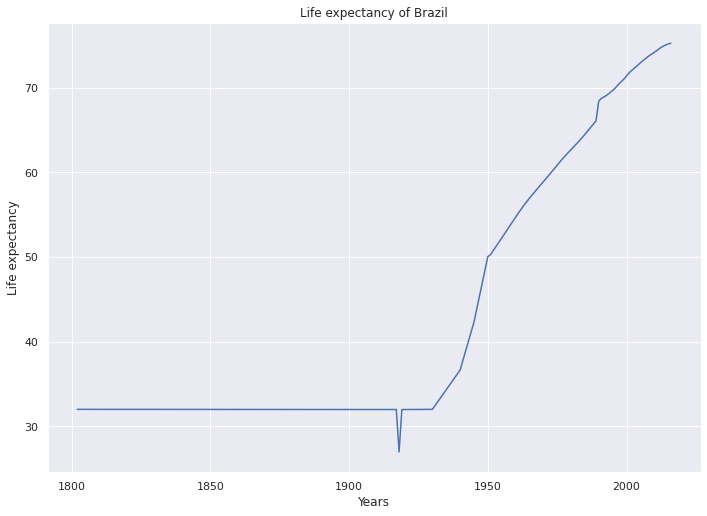

In [130]:
plt.plot(data.iloc[217:432]['Year'], data.iloc[217:432]['Life expectancy'])
plt.title("Life expectancy of Brazil")
plt.xlabel('Years')
plt.ylabel("Life expectancy")

Text(0, 0.5, 'Life expectancy')

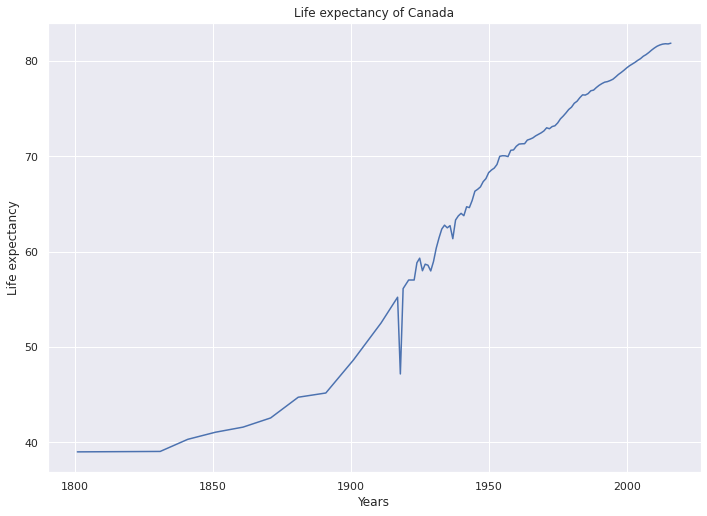

In [131]:
plt.plot(data.iloc[433:649]['Year'], data.iloc[433:649]['Life expectancy'])
plt.title("Life expectancy of Canada")
plt.xlabel('Years')
plt.ylabel("Life expectancy")

Text(0, 0.5, 'Life expectancy')

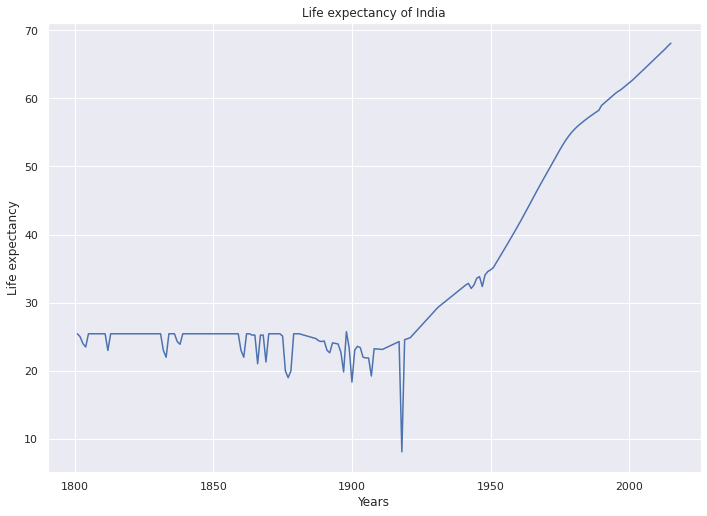

In [133]:
plt.plot(data.iloc[1301:1516]['Year'], data.iloc[1301:1516]['Life expectancy'])
plt.title("Life expectancy of India")
plt.xlabel('Years')
plt.ylabel("Life expectancy")

In [116]:
x = data.drop(['Life expectancy'], axis=1)
y = data["Life expectancy"]

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [168]:
model = RandomForestRegressor()

In [169]:
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [170]:
prediction = model.predict(x_test)

In [171]:
scores = cross_val_score(model, x_test, y_test, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [172]:
rmse_scores

array([3.1014899 , 2.00714031, 2.65635309, 3.35263631, 1.47379595,
       2.43932847, 1.52386546, 2.82271355, 2.51384501, 2.76264833])

In [175]:
dump(model, 'Life expentency predictor')

['Life expentency predictor']